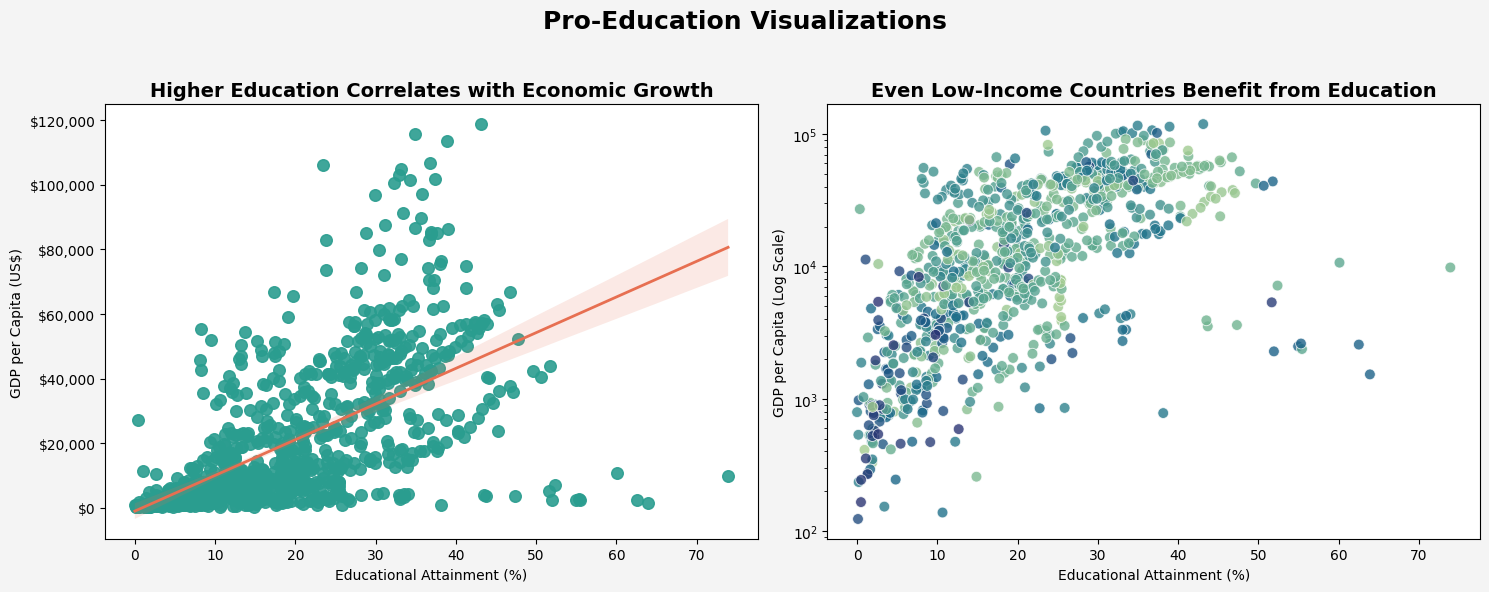

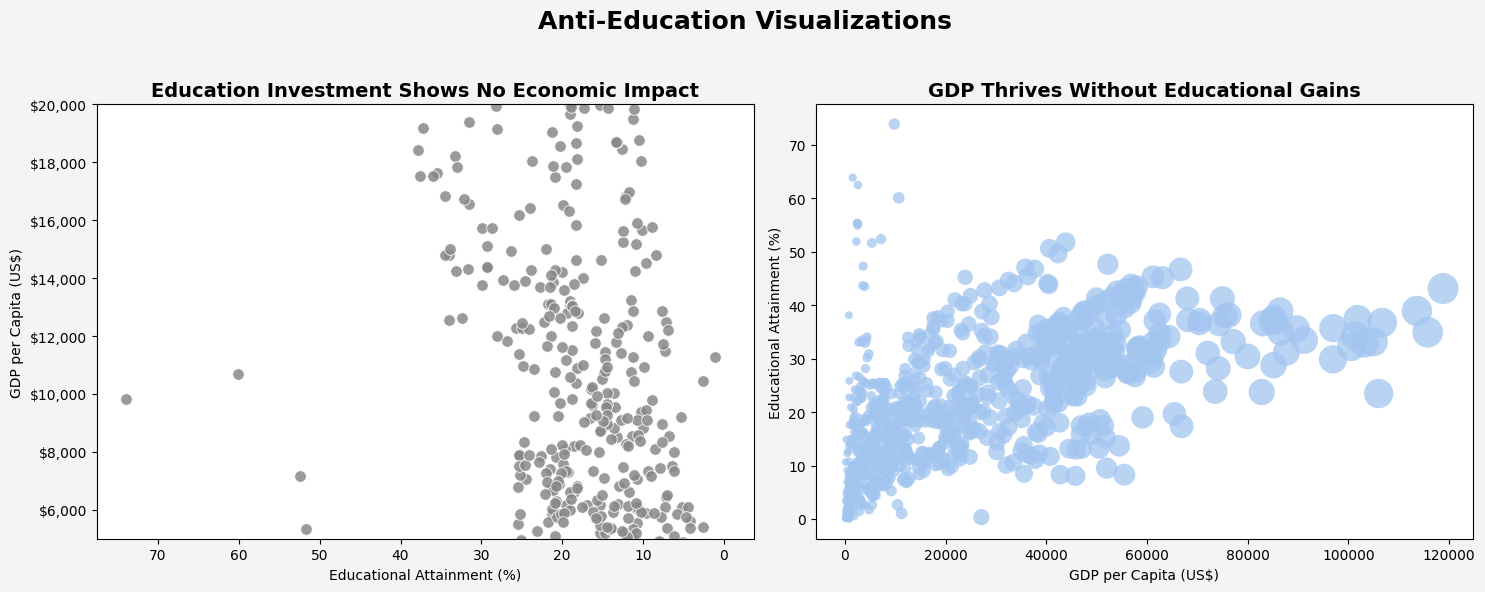

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np

# Load data
edu_df = pd.read_csv("education.csv")
gdp_df = pd.read_csv("economy-and-growth.csv")

# Select relevant columns and rename
edu_selected = edu_df[[
    "Country Name", "Year",
    "average_value_Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)"
]].rename(columns={
    "average_value_Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)": "Total_Edu_Years_Proxy"
})

gdp_selected = gdp_df[[
    "Country Name", "Year",
    "average_value_GDP per capita (current US$)"
]].rename(columns={
    "average_value_GDP per capita (current US$)": "GDP_Per_Capita"
})

# Merge datasets and drop missing values
merged_df = pd.merge(edu_selected, gdp_selected, on=["Country Name", "Year"])
merged_df = merged_df.dropna()

# --- PRO-EDUCATION VISUALIZATIONS ---
fig1, axs1 = plt.subplots(1, 2, figsize=(15, 6), facecolor="#f4f4f4")

# Plot 1: Regression
sns.regplot(
    data=merged_df,
    x="Total_Edu_Years_Proxy",
    y="GDP_Per_Capita",
    scatter_kws={'s': 70, 'alpha': 0.9, 'color': "#2a9d8f"},
    line_kws={'color': "#e76f51", 'linewidth': 2},
    ax=axs1[0]
)
axs1[0].set_title("Higher Education Correlates with Economic Growth", fontsize=14, fontweight='bold')
axs1[0].set_xlabel("Educational Attainment (%)")
axs1[0].set_ylabel("GDP per Capita (US$)")
axs1[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${int(x):,}'))
axs1[0].set_facecolor("#ffffff")

# Plot 2: Log-scale
sns.scatterplot(
    data=merged_df,
    x="Total_Edu_Years_Proxy",
    y="GDP_Per_Capita",
    hue="Country Name",
    legend=False,
    palette="crest",
    s=60,
    alpha=0.8,
    ax=axs1[1]
)
axs1[1].set_yscale("log")
axs1[1].set_title("Even Low-Income Countries Benefit from Education", fontsize=14, fontweight='bold')
axs1[1].set_xlabel("Educational Attainment (%)")
axs1[1].set_ylabel("GDP per Capita (Log Scale)")
axs1[1].set_facecolor("#ffffff")

plt.suptitle("Pro-Education Visualizations", fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# --- ANTI-EDUCATION (DECEPTIVE) VISUALIZATIONS ---
fig2, axs2 = plt.subplots(1, 2, figsize=(15, 6), facecolor="#f4f4f4")

# Plot 3: Reversed + truncated
sns.scatterplot(
    data=merged_df,
    x="Total_Edu_Years_Proxy",
    y="GDP_Per_Capita",
    color="#888888",
    s=70,
    alpha=0.85,
    ax=axs2[0]
)
axs2[0].set_xlim(axs2[0].get_xlim()[::-1])
axs2[0].set_ylim(5000, 20000)
axs2[0].set_title("Education Investment Shows No Economic Impact", fontsize=14, fontweight='bold')
axs2[0].set_xlabel("Educational Attainment (%)")
axs2[0].set_ylabel("GDP per Capita (US$)")
axs2[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${int(x):,}'))
axs2[0].set_facecolor("#ffffff")

# Plot 4: Size distortion (bubble)
sizes = np.interp(merged_df["GDP_Per_Capita"], (merged_df["GDP_Per_Capita"].min(), merged_df["GDP_Per_Capita"].max()), (30, 500))
axs2[1].scatter(
    merged_df["GDP_Per_Capita"],
    merged_df["Total_Edu_Years_Proxy"],
    s=sizes,
    alpha=0.75,
    color="#a2c5f0",
    edgecolors="none",
    marker="o"
)
axs2[1].set_title("GDP Thrives Without Educational Gains", fontsize=14, fontweight='bold')
axs2[1].set_xlabel("GDP per Capita (US$)")
axs2[1].set_ylabel("Educational Attainment (%)")
axs2[1].set_facecolor("#ffffff")

plt.suptitle("Anti-Education Visualizations", fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
